# 0.0 - Affinity Propagation

O parâmetro utilizado para treinar o algoritmo **Affinity Propagation** será o `preference` (*float*), `n_clusters`. Para mais detalhes do algoritmo, recomendamos a consulta da documentação oficial na página:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html

O parâmetro `preference` na implementação da biblioteca **sklearn** pode assumir tanto valores negativos quanto positivos. Ele influencia diretamente o número de clusters formados, uma vez que define a propensão de cada ponto a ser escolhido como exemplar (representante do cluster).

Em geral:  
- Um valor muito **baixo** de `preference` resultará em um grande número de clusters.  
- Um valor **alto** pode resultar em poucos ou até um único cluster.

Por padrão, se `preference` não for especificado, o *sklearn* define automaticamente os valores com base nos dados fornecidos, geralmente configurando como a **mediana das similaridades**.

# 1.0 - Importando bibliotecas 

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy  as np
from sklearn import cluster as c
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.metrics import euclidean_distances
from sklearn import metrics as m

# 2.0 - Funções

In [9]:
def treina_modelo(X_data, p_array):
    """
      Treina o algoritmo Affinity Propagation para diferentes valores do parâmetro preference,
      e armazena os resultados da Silhouette Score em dataset.
      
      Args:
          X_data (numpy.ndarray): Array NumPy contendo os dados a serem clusterizados.
          p_array (numpy.ndarray): Array NumPy contendo os valores de preference utilizados.
          
      Retorno:
      --------
      df_metrics : pandas.DataFrame
          DataFrame contendo as métricas calculadas:
          - 'preference': valor do parâmetro.
          - 'silhouette score média (avg SS)': métrica de performance.
          - 'número de clusters': quantidade total de clusters formados.
    """
    # Criar DataFrame para armazenar resultados
    metrics_df = pd.DataFrame(columns=["preference", "silhouette score média (avg SS)", "número de clusters"])
    for p in p_array:
        # model definition
        aff_prop = c.AffinityPropagation( preference = p, random_state = 0 )

        # model training (calcula as matrizes S, R, D e C)
        aff_prop.fit( X_data )

        # performance
        ss_avg = np.round( m.silhouette_score( X_data, aff_prop.labels_ ), 5 )
        
        # clusters por amostra
        rotulos = aff_prop.labels_

        new_row = pd.DataFrame({"preference": [p], 
                                "silhouette score média (avg SS)": [ss_avg],
                                "número de clusters": [len( np.unique(rotulos) )]})

        # Concatenar a nova linha ao DataFrame existente
        metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
    return metrics_df


def plot_silhouette(p_array, silhouette_scores):
    """
      Plota o Silhouette Score para diferentes valores do parâmetro preference.

      Esta função recebe os resultados pré-calculados do Affinity Propagation para 
      diferentes valores do parâmetro preference e plota os gráficos do Silhouette Score, 
      facilitando a visualização e comparação para a escolha do valor ideal de preference.

      Args:
          aff_prop (sklearn.cluster.AffinityPropagation): Modelo Affinity Propagation já treinado.
          p_array (numpy.ndarray): Array NumPy contendo os valores de preference utilizados.
          silhouette_scores (numpy.ndarray): Array NumPy contendo os valores médios do Silhouette Score para preference.
      """
    # Plot Silhouette Score
    plt.plot(p_array, silhouette_scores)
    plt.xlabel( 'Preference' )
    plt.ylabel( 'Silhouette Score' )
    plt.title( 'Affinity Propagation')
    plt.show()
    
def visualiza_clusters(X_data, p):
    """
      Visualiza os clusters obtidos através do algoritmo Affinity Propagation.

      Esta função recebe um array NumPy contendo os dados e o valor do parâmetro preference desejado,
      plota um scatter plot com os pontos coloridos de acordo com o cluster a que pertencem. 
      Também plota os centróides dos clusters com marcadores 'x' vermelhos.

      Args:
          X_data (numpy.ndarray): Array NumPy contendo os dados a serem clusterizados.
          p (float): valor do parâmetro preference desejado para o Affinity Propagation.
      """
    aff_prop = c.AffinityPropagation( preference = p, random_state = 0 )
    labels = aff_prop.fit_predict(X_data)

    plt.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis')
    plt.scatter(aff_prop.cluster_centers_[:, 0], aff_prop.cluster_centers_[:, 1], marker='x', s=200, c='red')
    plt.xlabel('alcohol')
    plt.ylabel('malic acid')
    plt.title(f'Clusters para preference={p}')
    plt.show();

# 3.0 - Carregando os dados

In [4]:
df = pd.read_csv('data/X_dataset.csv')
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


# 4.0 - Desempenho do modelo

In [5]:
# Como temos apenas dados numéricos, a seleção é mais simples. 
# X: Array NumPy contendo todas as features numéricas extraídas diretamente do DataFrame Pandas.
X = df.values

In [10]:
# Array com os valores do hiper-parâmetro 'preference'
p_array = np.arange(-60, -1, 1)

metrics_df = treina_modelo(X, p_array)
metrics_df

,preference,silhouette score média (avg SS),número de clusters
0,-60,0.18318,6
1,-59,0.18318,6
2,-58,0.18318,6
3,-57,0.18318,6
4,-56,0.20118,7
5,-55,0.20118,7
6,-54,0.18423,7
7,-53,0.19924,7
8,-52,0.20229,7
9,-51,0.20229,7


## 4.1 - Melhor p segundo a métrica de *Silhouette Score*

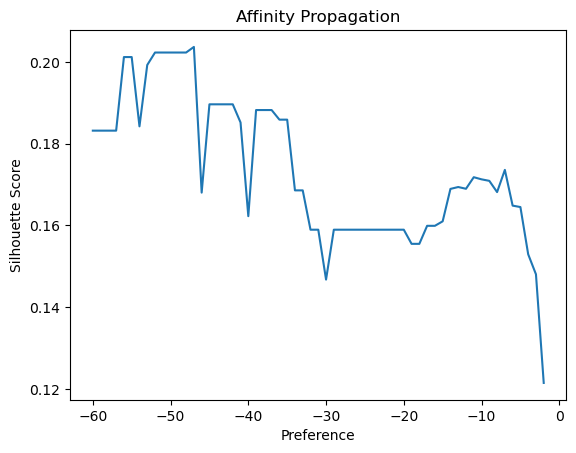

In [11]:
# Gráfico da 'silhouette score média (avg SS)' em função do 'preference'
plot_silhouette(p_array, metrics_df['silhouette score média (avg SS)'].values)

In [12]:
# Melhor valor de 'preference'
metrics_df.sort_values(by='silhouette score média (avg SS)', ascending=False).head(1)

,preference,silhouette score média (avg SS),número de clusters
13,-47,0.20366,7


## 4.2 - Treinando o algoritmo com o melhor valor de `preference`

In [13]:
best_p = -47

# model definition
best_model = c.AffinityPropagation( preference = best_p, random_state = 0 )

# model training (calcula S, R, D e C)
best_model.fit( X )

# rotulos dos clusters
rotulos = best_model.labels_

In [37]:
# Qtde de clusters gerados com o melhor parâmetro
print(f"Número de clusters devido a aplicação do Affinity Propagation com preference = {best_p}:\n{len( np.unique(rotulos))} clusters")

Número de clusters devido a aplicação do Affinity Propagation com preference = -47:
7 clusters


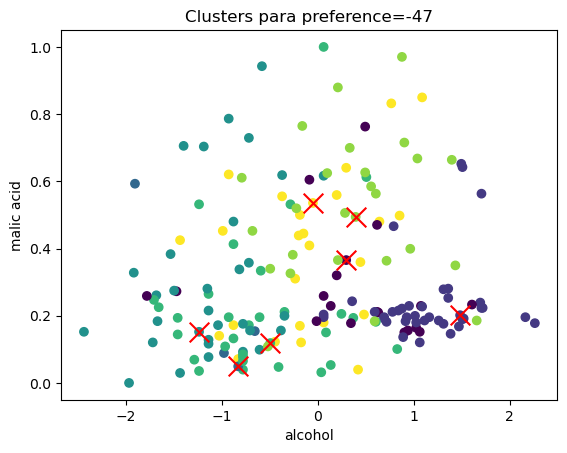

In [15]:
# Visualização dos clusters com o melhor p
visualiza_clusters(X, -47)

A exemplo do que foi observado no ensaio do *K-Means*, um valor de **0.20366** para a **Silhouette Score Média** indica que os **7** clusters identificados pelo algoritmo *Affinity Propagation* não estão muito bem definidos. 

# 5.0 - Refinamento do pré-processamento

Novamente, iremos aplicar a mesma análise que fizemos no outro ensaio com o objetivo de melhorar o desempenho do modelo, a saber: **Análise de Correlação entre as features** e **Remoção de Outliers**.


Relembrando o que foi feito no último ensaio, extraímos as variáveis `total_phenols` e `od280` devido à alta correlação observada na **Matriz de Correlações** e eliminamos os poucos *outliers* presentes no conjunto de dados (Para maiores detalhes, consultar o ensaio do *K-Means*).  
Vamos replicar esse mesmo processo aqui:

In [16]:
# Extração das colunas 'total_phenols' e 'od280'
df1 = df.drop(columns=['total_phenols', 'od280'])

In [17]:
# Definindo um limiar de 3 desvios-padrão (remoção dos outliers)
z_scores = np.abs(stats.zscore(df1))
df1_cleaned = df1[(z_scores < 3).all(axis=1)]

# 6.0 - Desempenho do modelo refinado

In [18]:
df1_cleaned = df1_cleaned.reset_index(drop=True)
X_ = df1_cleaned.values

# Array com os valores do hiper-parâmetro 'preference'
p_array = np.arange(-60, -1, 1)

metrics_df_ = treina_modelo(X_, p_array)

In [19]:
metrics_df_.sort_values(by='silhouette score média (avg SS)', ascending=False).head(1)

,preference,silhouette score média (avg SS),número de clusters
8,-52,0.19128,5


## 6.1 - Treinando com o melhor valor de `preference` pós refinamento do modelo

In [20]:
best_p_ = -52

# model definition
best_model_ = c.AffinityPropagation( preference = best_p_, random_state = 0 )

# model training (calcula S, R, D e C)
best_model_.fit( X_ )

# rotulos dos clusters
rotulos_ = best_model_.labels_

In [36]:
# Qtde de clusters gerados com o melhor parâmetro (pós refinamento)
print(f"Número de clusters devido a aplicação do Affinity Propagation com preference = {best_p_}:\n{len( np.unique(rotulos_))} clusters")

Número de clusters devido a aplicação do Affinity Propagation com preference = -52:
5 clusters


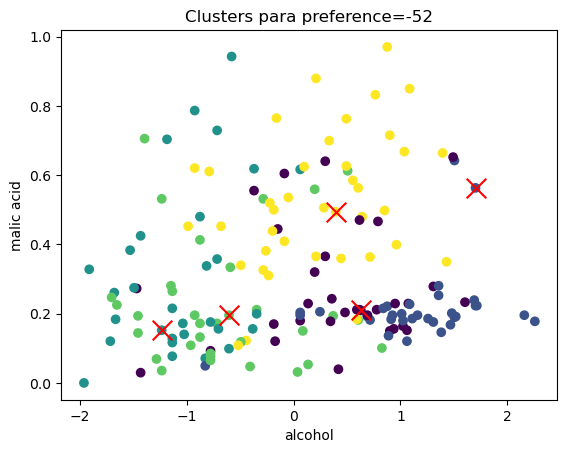

In [22]:
# Visualização dos clusters com o melhor p
visualiza_clusters(X_, -52)

# 7.0 - Conclusão

Mesmo após a etapa de refinamento dos dados, envolvendo a exclusão de variáveis altamente correlacionadas e a remoção dos *outliers*, não foi possível elevar o desempenho do modelo no que diz respeito à **Silhouette Score Média**. O gráfico de dispersão acima é um reflexo disso: os clusters ainda estão sobrepostos. Além do mais, o número de agrupamentos encontrado (**5**) não representa com fidelidade os **3** tipos de vinhos analisados.

Observando o gráfico abaixo, que ilustra o número de *clusters* formados para cada valor de *preference*, entendemos que:

- valores maiores de `preference` incentivam a formação de muitos clusters pequenos, enquanto que valores baixos favorecem a formação de poucos e grandes clusters;

A grosso modo, percebemos que ajustar **apenas** este hiper-parâmetro não foi suficiente para obter resultados ideais. Poderíamos também explorar o impacto de outros hiper-parâmetros como **damping**, **max_iter** e **convergence_iter** na performance, bem como treinar outros algoritmos de clusterização.

No próximo ciclo de aprendizado, é recomendável lançar mão de técnicas mais avançadas de **Redução de Dimensionalidade** como **PCA**. Enfatizamos que na versão atual do curso, ferramentas deste tipo não foram abordadas.

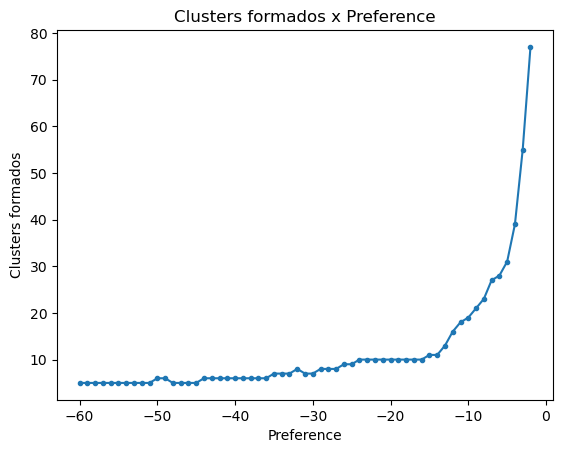

In [26]:
# Plot Clusters formados x Preference
plt.plot(p_array, metrics_df_['número de clusters'].values, marker = '.')
plt.xlabel( 'Preference' )
plt.ylabel( 'Clusters formados' )
plt.title( 'Clusters formados x Preference')
plt.show()